In [1]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_circles

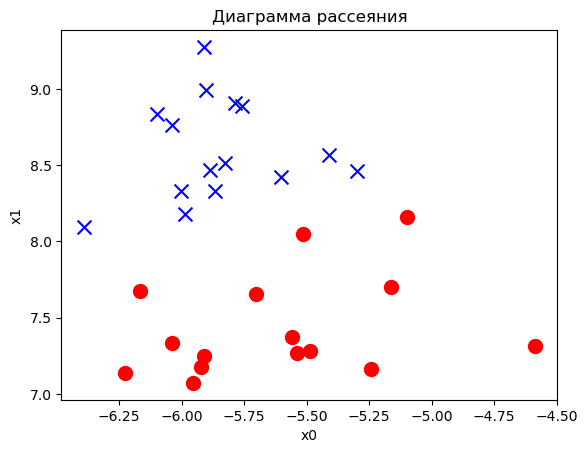

In [3]:
# Генерация линейно разделимого датасета
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

# Визуализация датасета
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [5]:
# Создание и обучение модели SVM с линейным ядром
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

# Вывод коэффициентов
print("Коэффициенты:", svm_linear.coef_)
print("Свободный член:", svm_linear.intercept_)

Коэффициенты: [[-2.49920793  6.14683189]]
Свободный член: [-64.2533988]


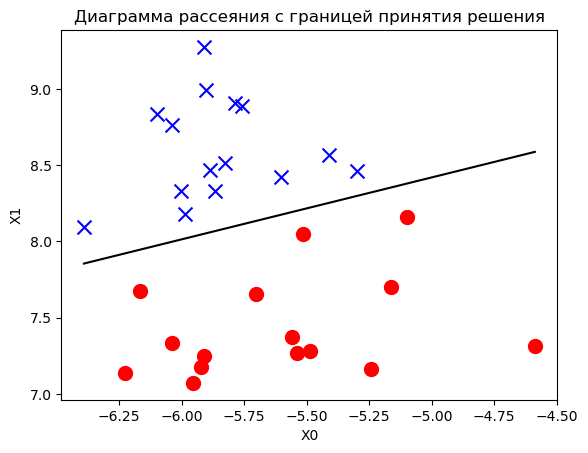

In [7]:
# Визуализация границы принятия решения
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])

plt.plot(X0, -svm_linear.intercept_[0]/svm_linear.coef_[0][1] - svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [9]:
# Вывод информации об опорных векторах
print("Опорные векторы:", svm_linear.support_vectors_)
print("Индексы опорных векторов:", svm_linear.support_)
print("Количество опорных векторов:", svm_linear.n_support_)

Опорные векторы: [[-5.51629264  8.04763857]
 [-5.30025769  8.46071981]
 [-5.9879581   8.18112559]]
Индексы опорных векторов: [ 0  8 29]
Количество опорных векторов: [1 2]


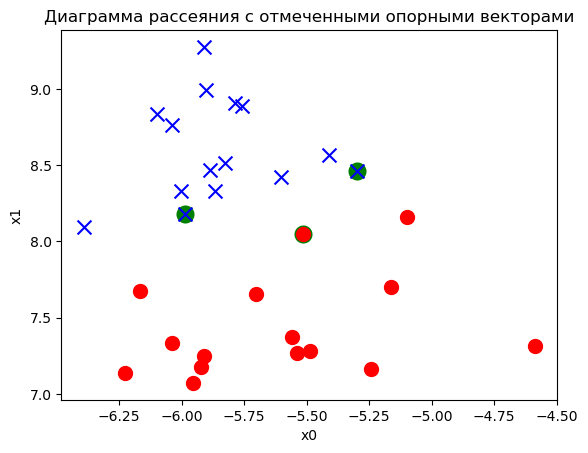

In [11]:
# Визуализация опорных векторов
plt.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

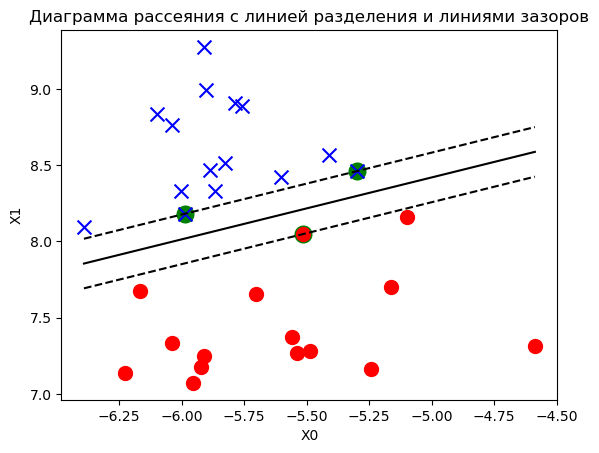

In [13]:
# Визуализация границы принятия решения и линий зазора
plt.plot(X0, -svm_linear.intercept_[0]/svm_linear.coef_[0][1] - svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0, (-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1] - svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, linestyle='--', c='k')
plt.plot(X0, (-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1] - svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

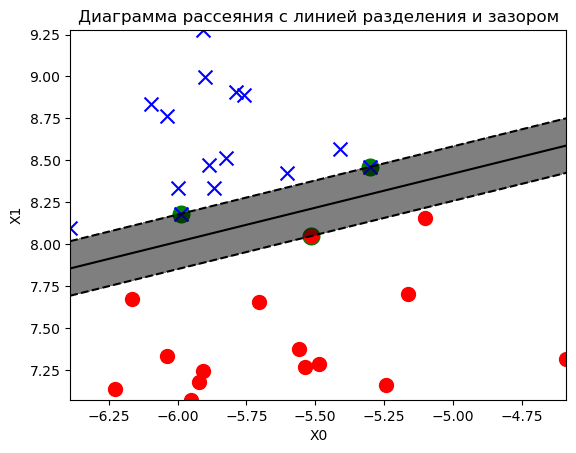

In [15]:
# Функция для визуализации границ принятия решения
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

# Проверка функции
plot_decision_regions(X, y, svm_linear)

In [17]:
# Оценка качества модели
y_pred = svm_linear.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Confusion matrix:\n", metrics.confusion_matrix(y, y_pred))

Accuracy: 1.0
Confusion matrix:
 [[15  0]
 [ 0 15]]


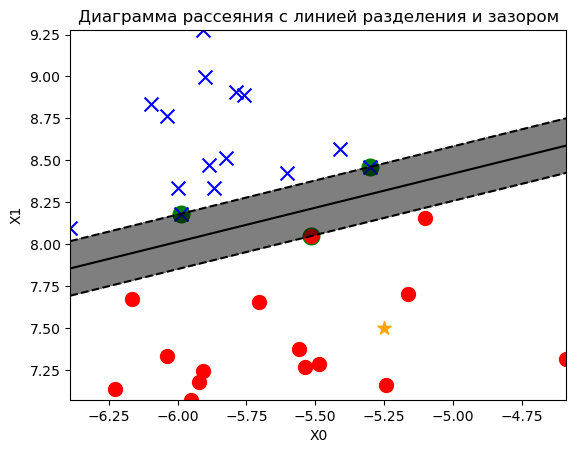

Decision function value: [-5.03131797]
Predicted class: [0]


In [19]:
# Предсказание для новой точки
observation_new = [[-5.25, 7.5]]
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

print("Decision function value:", svm_linear.decision_function(observation_new))
print("Predicted class:", svm_linear.predict(observation_new))

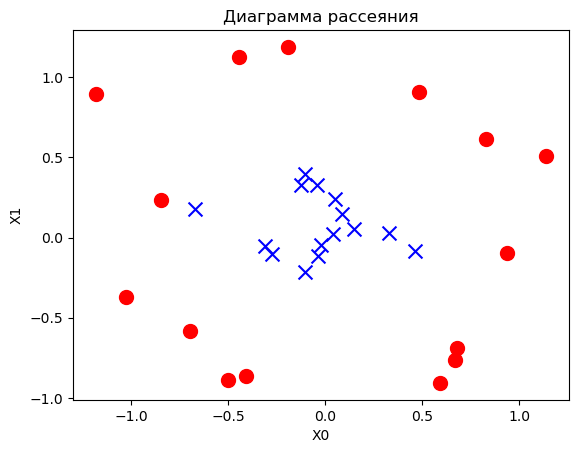

In [21]:
# Линейно неразделимые данные с зазором
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

Количество опорных векторов: [6 2]
Индексы опорных векторов: [11 20 21 23 28 29 25 27]
Опорные векторы: [[ 0.9388294  -0.09554628]
 [-0.84682371  0.23287306]
 [-0.19166925  1.18895776]
 [-0.69539045 -0.58523359]
 [ 0.68060508 -0.68615145]
 [ 0.48354792  0.91063288]
 [-0.66975235  0.17866445]
 [ 0.46427295 -0.08540628]]


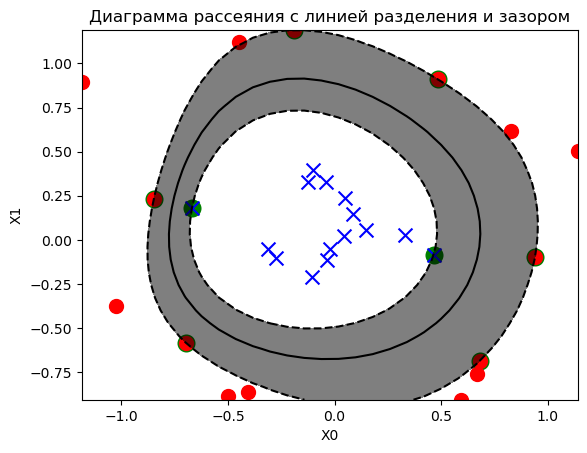

Accuracy: 1.0
Confusion matrix:
 [[15  0]
 [ 0 15]]


In [23]:
# SVM с RBF ядром
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

# Информация об опорных векторах
print("Количество опорных векторов:", svm_rbf.n_support_)
print("Индексы опорных векторов:", svm_rbf.support_)
print("Опорные векторы:", svm_rbf.support_vectors_)

# Визуализация
plot_decision_regions(X, y, svm_rbf)

# Оценка качества
y_pred = svm_rbf.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Confusion matrix:\n", metrics.confusion_matrix(y, y_pred))

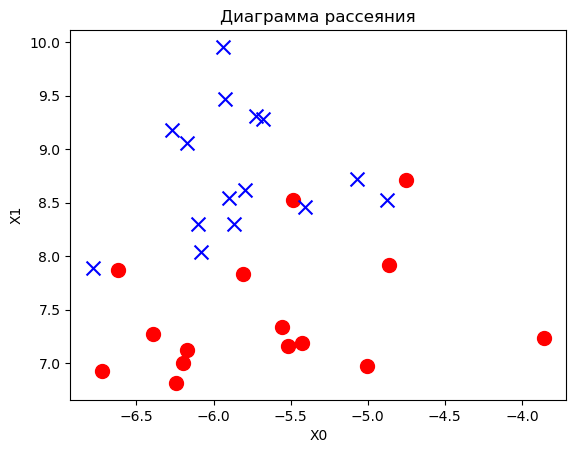

In [25]:
# Данные без зазора
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

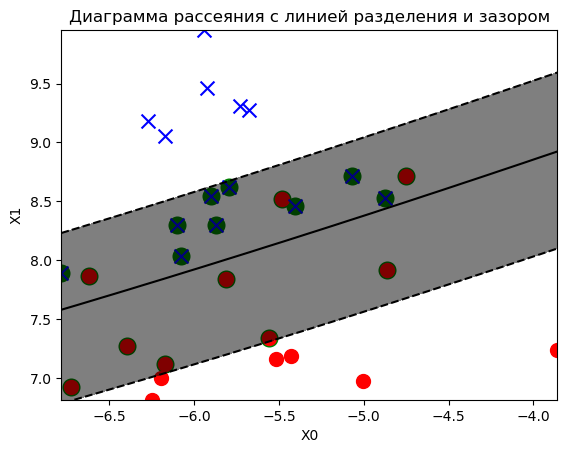

Количество опорных векторов: [9 9]
Accuracy: 0.9
Confusion matrix:
 [[12  3]
 [ 0 15]]


In [27]:
# SVM с полиномиальным ядром и мягким зазором
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

# Визуализация
plot_decision_regions(X, y, svm_poly)

# Количество опорных векторов
print("Количество опорных векторов:", svm_poly.n_support_)

# Оценка качества
y_pred = svm_poly.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Confusion matrix:\n", metrics.confusion_matrix(y, y_pred))